In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../data/data.csv')

In [4]:
data.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


In [6]:
data.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


## Visuals

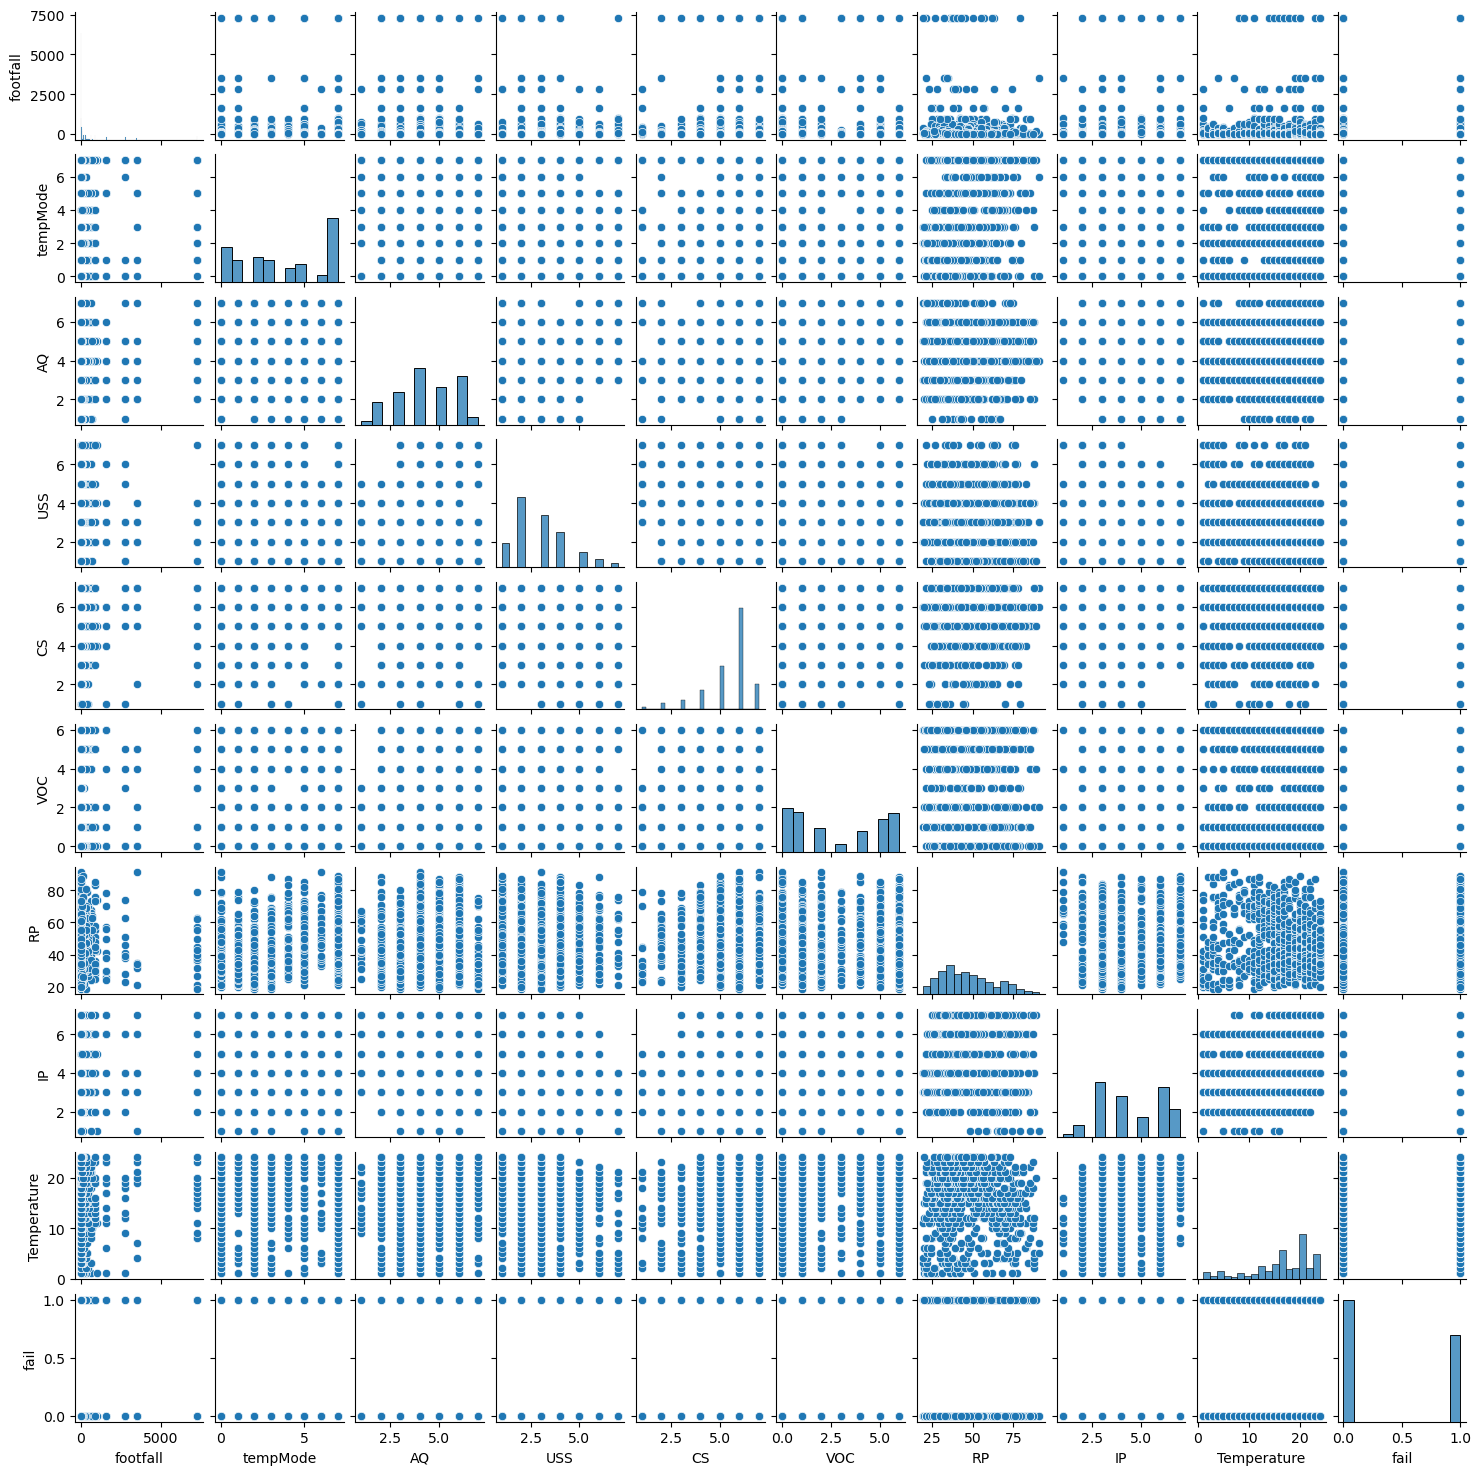

In [8]:
sns.pairplot(data, height=1.5)
plt.show()

VOC has a bimodal distribution that is alsmost symetrical. I want to explore this further to see if this is related to failure. 
USS is skewed right.

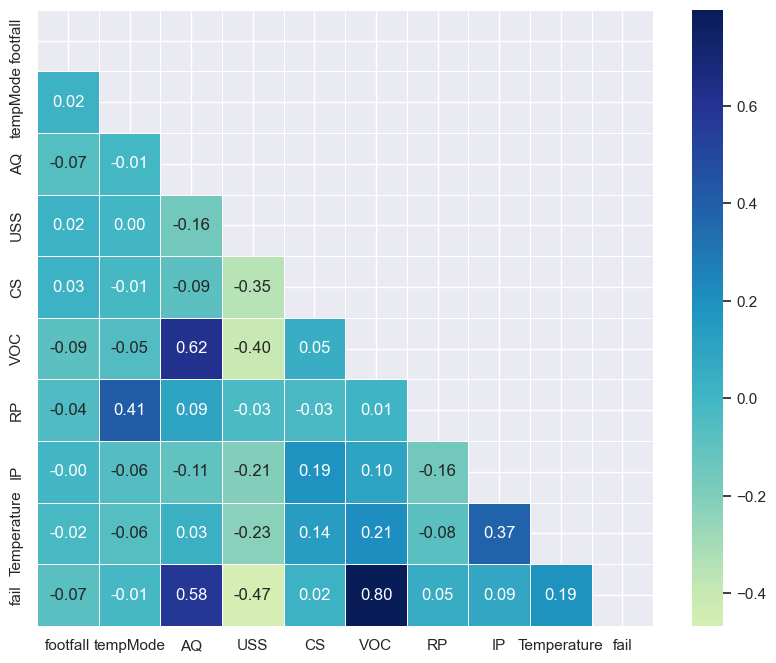

In [17]:
c = data.corr()
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(c, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask
sns.heatmap(c, 
            mask=mask, 
            annot=True, 
            center=0,
            linewidth=0.4,
            square=True,
            cmap="YlGnBu",
            fmt=".2f")

plt.show()

VOC, AQ and USS seem to have the highest correlation. 

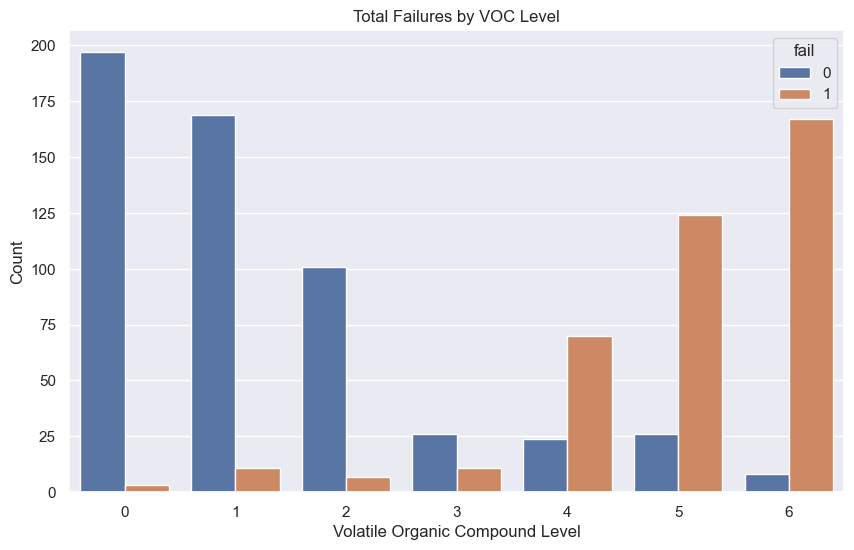

In [10]:
#Looking into the threshold for VOC and how it effects failure
voc_count_df = data.groupby(by='VOC')['fail'].value_counts().reset_index()

plt.figure(figsize=(10, 6))
sns.set_theme(style ='darkgrid')
sns.barplot(x='VOC', y='count', hue='fail', data=voc_count_df)
plt.xlabel('Volatile Organic Compound Level')
plt.ylabel('Count')
plt.title('Total Failures by VOC Level')
plt.show()


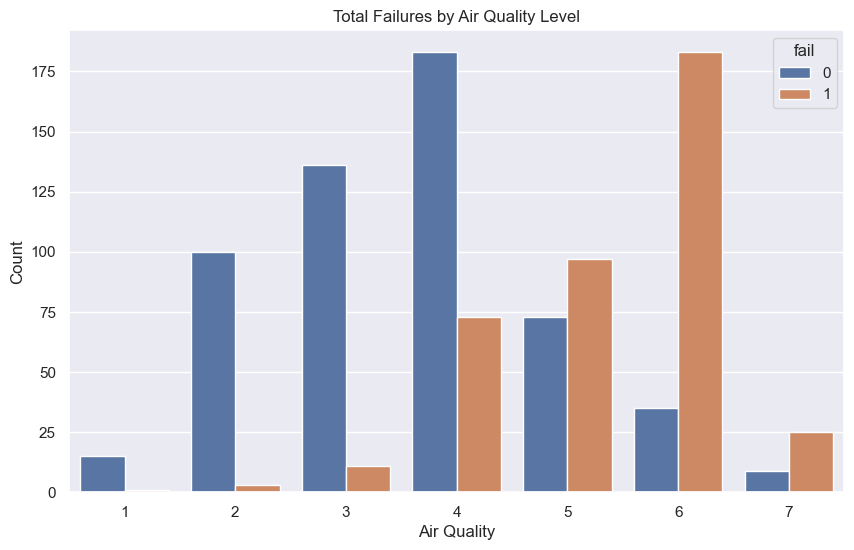

In [11]:
#Looking into the threshold for AQ and how it effects failure
aq_count_df = data.groupby(by='AQ')['fail'].value_counts().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='AQ', y='count', hue='fail', data=aq_count_df)
sns.set_theme(style ='darkgrid')
plt.xlabel('Air Quality')
plt.ylabel('Count')
plt.title('Total Failures by Air Quality Level')
plt.show()

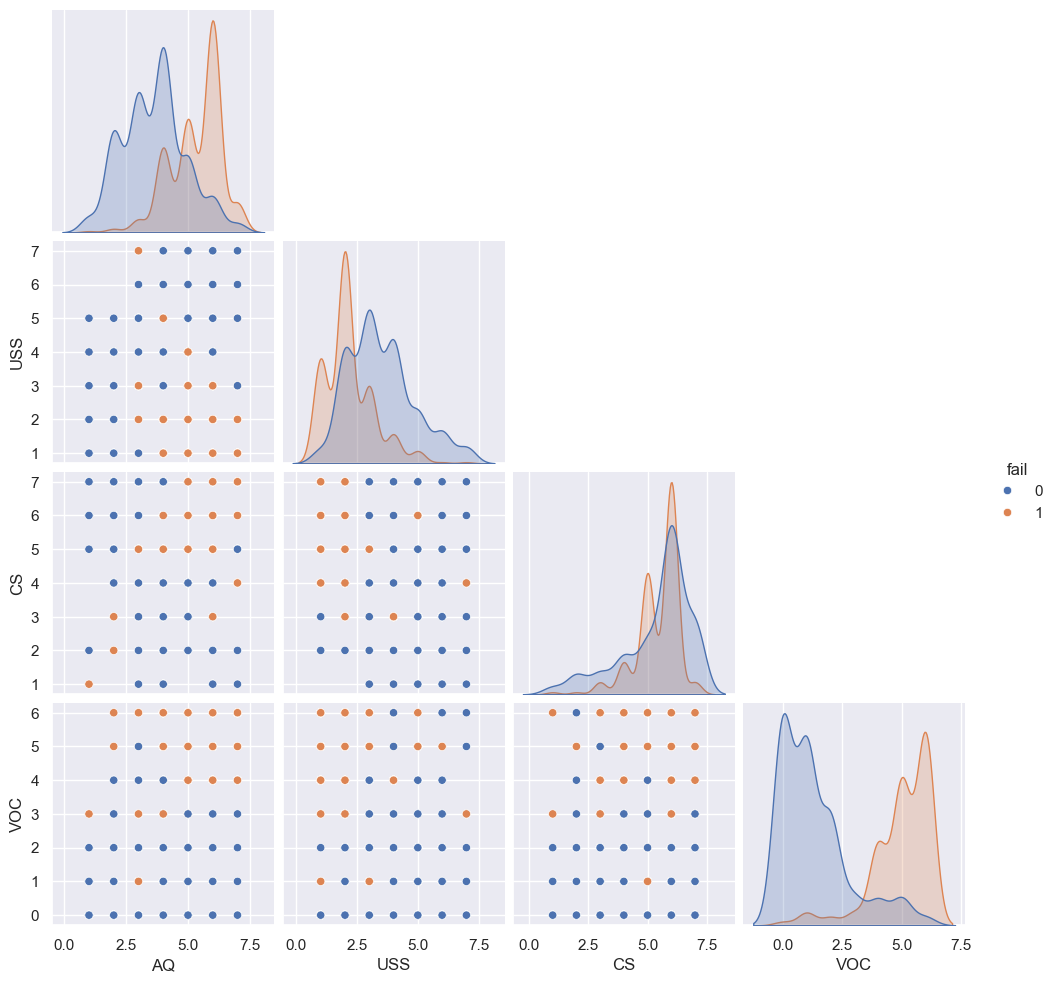

In [13]:
#More Tailored Pairplot
cols_wanted = [ 'AQ','USS', 'CS', 'VOC', 'fail']

sns.pairplot(data[cols_wanted],corner=True, hue='fail')
plt.show()

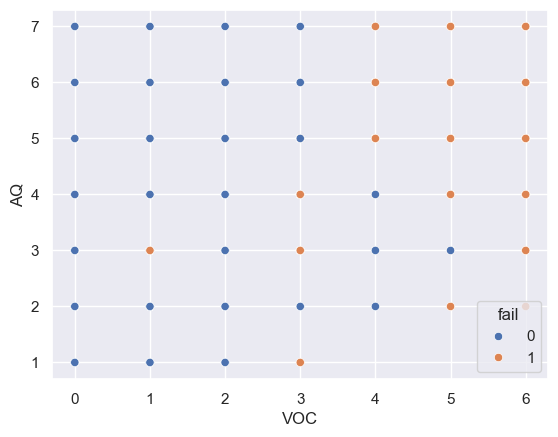

In [14]:
sns.scatterplot(data=data, x='VOC', y='AQ', hue='fail')
plt.show()

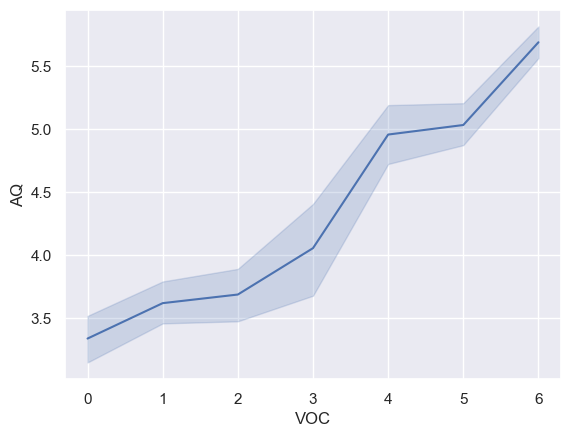

In [15]:
sns.lineplot(data=data, x='VOC', y='AQ')
plt.show()